# Customer Service Requests analysis
## Dataset : Customer Service_Requests_from_2010_to_Present
## Python libraries used : NumPy, Pandas, Matplotlib, Seaborn, SciPy and Regex

### Solution:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
import re

## Data Preparation
### 1. Importing a dataset

In [4]:
# reading the dataset
# Our Dataset is very large so setting low_memory to false
df = pd.read_csv('Customer Service_Requests_from_2010_to_Present.csv', low_memory=False)

### 2. Provide your insight on the information and details that the provided dataset carries. 

In [6]:
# shape of the dataset
df.shape

(300698, 53)

In [7]:
# viewing the columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [9]:
# View the top 5 elements of the dataset
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### 3. Convert the columns "Created Date" and "Closed Date" to datetime datatype and create a new column "Request_Closing_Time" as the time elapsed between request creation and request closing 
Converting the "Created Date" and "Closed Date" columns into datetime format using regex and calculates the time difference between them to create a new column called "Request_Closing_Time".

In [11]:
def convert_date_format(date_str):
    date_str = str(date_str).strip()  # Remove whitespace

    # Format 1: MM-DD-YY HH:MM or MM-DD-YY HH:MM:SS
    if re.match(r'^\d{2}-\d{2}-\d{2} \d{1,2}:\d{2}(:\d{2})?$', date_str):
        # Try seconds format first
        dt = pd.to_datetime(date_str, format="%m-%d-%y %H:%M:%S", errors='coerce')
        if pd.isna(dt):
            # Fallback to no-seconds format
            dt = pd.to_datetime(date_str, format="%m-%d-%y %H:%M", errors='coerce')
        return dt

    # Format 2: MM/DD/YYYY HH:MM:SS AM/PM
    elif re.match(r'^\d{2}/\d{2}/\d{4} \d{1,2}:\d{2}:\d{2} (AM|PM)$', date_str):
        return pd.to_datetime(date_str, format="%m/%d/%Y %I:%M:%S %p", errors='coerce')

    else:
        return pd.NaT

# Apply to both columns
df['Created Date'] = df['Created Date'].astype(str).apply(convert_date_format)
df['Closed Date'] = df['Closed Date'].astype(str).apply(convert_date_format)

# Calculate the time difference
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

# View result
df[['Created Date', 'Closed Date', 'Request_Closing_Time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   Created Date          300698 non-null  datetime64[ns] 
 1   Closed Date           298534 non-null  datetime64[ns] 
 2   Request_Closing_Time  298534 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), timedelta64[ns](1)
memory usage: 6.9 MB


In [12]:
# Checking the first 5 rows for datetime format in 'Created Date' and 'Closed Date'
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02


### 4. Write a python program to drop irrelevant Columns which are listed below. 
['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 
2','Intersection Street 1', 'Intersection Street 2','Address Type','Park Facility 
Name','Park Borough','School Name', 'School Number','School 
Region','School Code','School Phone Number','School Address','School City', 
'School State','School Zip','School Not Found','School or Citywide 
Complaint','Vehicle Type', 'Taxi Company Borough','Taxi Pick Up 
location','Bridge Highway Name','Bridge Highway Direction', 
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry 
Direction','Ferry Terminal Name','Landmark', 
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due 
Date','Resolution Action Updated Date','Community Board','Facility Type', 
'Location'] 

In [14]:
# dropping the irrelevant columns

irrelevant_columns = [
    'Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2',
    'Intersection Street 1', 'Intersection Street 2','Address Type','Park Facility Name',
    'Park Borough','School Name', 'School Number','School Region','School Code',
    'School Phone Number','School Address','School City','School State','School Zip',
    'School Not Found','School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough',
    'Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction','Road Ramp',
    'Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name',
    'Landmark','X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date',
    'Resolution Action Updated Date','Community Board','Facility Type','Location'
]

df = df.drop(irrelevant_columns, axis=1)

In [15]:
# checking the shape of dataset
df.shape

(300698, 15)

In [16]:
# checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              300698 non-null  int64          
 1   Created Date            300698 non-null  datetime64[ns] 
 2   Closed Date             298534 non-null  datetime64[ns] 
 3   Agency                  300698 non-null  object         
 4   Complaint Type          300698 non-null  object         
 5   Descriptor              294784 non-null  object         
 6   Location Type           300567 non-null  object         
 7   Incident Zip            298083 non-null  float64        
 8   City                    298084 non-null  object         
 9   Status                  300698 non-null  object         
 10  Resolution Description  300698 non-null  object         
 11  Borough                 300698 non-null  object         
 12  Latitude        

### 5. Write a python program to remove the NaN missing values from updated dataframe.  
To remove NaN values from the DataFrame, I used the `dropna()` function. It deletes rows or columns with missing data.

In [18]:
# Checking the number of null values in the columns
df.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
Request_Closing_Time      2164
dtype: int64

In [19]:
# Remove rows with any NaN values
df.dropna(inplace=True)
df.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Status                    0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
Request_Closing_Time      0
dtype: int64

In [20]:
# checking the shape datset
df.shape

(291107, 15)

### 6. Write a python program to see the unique values from all the columns in the dataframe. 
Displaying First 5 Unique Values from Each Column

In [22]:
# Loop through each column in the DataFrame
for column in df.columns:
    print(f"Unique values in '{column}':")

    # show the first 5 unique values
    print(df[column].unique()[:5])

    # Using Separator for readability
    print("-" * 70)
    

Unique values in 'Unique Key':
[32310363 32309934 32309159 32305098 32306529]
----------------------------------------------------------------------
Unique values in 'Created Date':
<DatetimeArray>
['2015-12-31 23:59:45', '2015-12-31 23:59:44', '2015-12-31 23:59:29',
 '2015-12-31 23:57:46', '2015-12-31 23:56:58']
Length: 5, dtype: datetime64[ns]
----------------------------------------------------------------------
Unique values in 'Closed Date':
<DatetimeArray>
['2016-01-01 00:55:00', '2016-01-01 01:26:00', '2016-01-01 04:51:00',
 '2016-01-01 07:43:00', '2016-01-01 03:24:00']
Length: 5, dtype: datetime64[ns]
----------------------------------------------------------------------
Unique values in 'Agency':
['NYPD']
----------------------------------------------------------------------
Unique values in 'Complaint Type':
['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial']
----------------------------------------------------------------

## Data Analysis
### 7. Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of the data frame.  

#### Summary Statistics
Calculated key summary statistics (sum, mean, standard deviation, skewness, and kurtosis) for the dataset. 

In [24]:
# Summary statistics for numeric columns only
print("Sum of each column:\n", df.sum(numeric_only=True))
print("\nMean of each column:\n", df.mean(numeric_only=True))
print("\nStandard Deviation of each column:\n", df.std(numeric_only=True))
print("\nSkewness of each column:\n", df.skew(numeric_only=True))
print("\nKurtosis of each column:\n", df.kurt(numeric_only=True))

Sum of each column:
 Unique Key      9.112108e+12
Incident Zip    3.160833e+09
Latitude        1.185553e+07
Longitude      -2.152010e+07
dtype: float64

Mean of each column:
 Unique Key      3.130158e+07
Incident Zip    1.085798e+04
Latitude        4.072568e+01
Longitude      -7.392504e+01
dtype: float64

Standard Deviation of each column:
 Unique Key      575377.738707
Incident Zip       580.280774
Latitude             0.082411
Longitude            0.078654
dtype: float64

Skewness of each column:
 Unique Key      0.016898
Incident Zip   -2.553956
Latitude        0.123114
Longitude      -0.312739
dtype: float64

Kurtosis of each column:
 Unique Key      -1.176593
Incident Zip    37.827777
Latitude        -0.734818
Longitude        1.455600
dtype: float64


### 8. Write a Python program to calculate and show correlation of all variables.

#### Correlation Analysis
To understand the relationship between numerical variables in the dataset, calculated their correlation matrix.

In [26]:
# Calculate and display correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Displaying the correlation matrix
correlation_matrix

,Unique Key,Incident Zip,Latitude,Longitude
Unique Key,1.000000,0.025492,-0.032613,-0.008621
Incident Zip,0.025492,1.000000,-0.499081,0.385934
Latitude,-0.032613,-0.499081,1.000000,0.368819
Longitude,-0.008621,0.385934,0.368819,1.000000


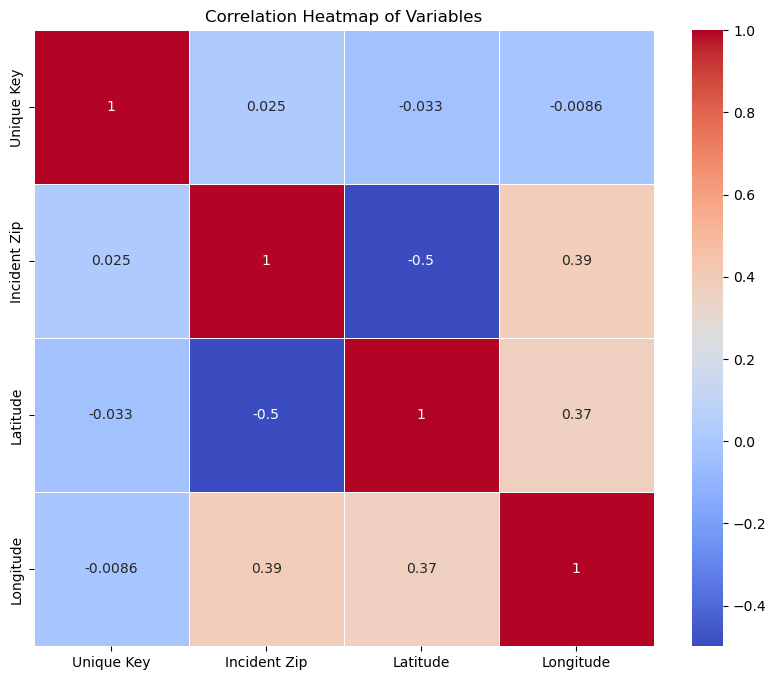

In [27]:
plt.figure(figsize=(10,8))

# Create a heatmap to show correlation between variables
# 'annot=True' shows the numeric values inside the squares
# 'cmap' sets the color theme, and 'linewidth=0.5' adds space between squares
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap of Variables')

# Display the plot
plt.show()

## Data Exploration
### 9. Provide four major insights through visualization that you come up after data mining.

In [29]:
# applying describe on the dataset
df.describe()

,Unique Key,Created Date,Closed Date,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,2.911070e+05,291107,291107,291107.000000,291107.000000,291107.000000,291107
mean,3.130158e+07,2015-08-14 11:25:43.378747648,2015-08-14 15:44:15.511413248,10857.977349,40.725681,-73.925035,0 days 04:18:32.132665995
min,3.027948e+07,2015-03-29 00:33:01,2015-03-29 00:57:23,83.000000,40.499135,-74.254937,0 days 00:01:00
25%,3.079934e+07,2015-06-08 15:38:00,2015-06-08 21:25:00,10314.000000,40.668926,-73.970957,0 days 01:16:30
50%,3.130675e+07,2015-08-13 22:57:41,2015-08-14 02:50:57,11209.000000,40.717782,-73.930774,0 days 02:42:38
75%,3.179091e+07,2015-10-19 15:03:16.500000,2015-10-19 20:58:35.500000,11238.000000,40.782973,-73.875788,0 days 05:20:24
max,3.231065e+07,2015-12-31 23:59:45,2016-01-03 16:22:00,11697.000000,40.912869,-73.700760,24 days 16:52:22
std,5.753777e+05,NaN,NaN,580.280774,0.082411,0.078654,0 days 06:03:45.509089128


In [30]:
# Viewing the columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

#### Insight 1: Top Complaint Types  
This chart shows which complaint types happen the most. It helps us see the common issues people report.

In [32]:
# Count the number of occurrences for each complaint type
complaints_count = df['Complaint Type'].value_counts().sort_values(ascending=True)
complaints_count

Complaint Type
Graffiti                      113
Disorderly Youth              285
Posting Advertisement         647
Noise - House of Worship      920
Drinking                     1270
Vending                      3773
Noise - Park                 3927
Traffic                      4466
Animal Abuse                 7744
Noise - Vehicle             16868
Derelict Vehicle            17506
Noise - Commercial          35144
Noise - Street/Sidewalk     47747
Illegal Parking             74021
Blocked Driveway            76676
Name: count, dtype: int64

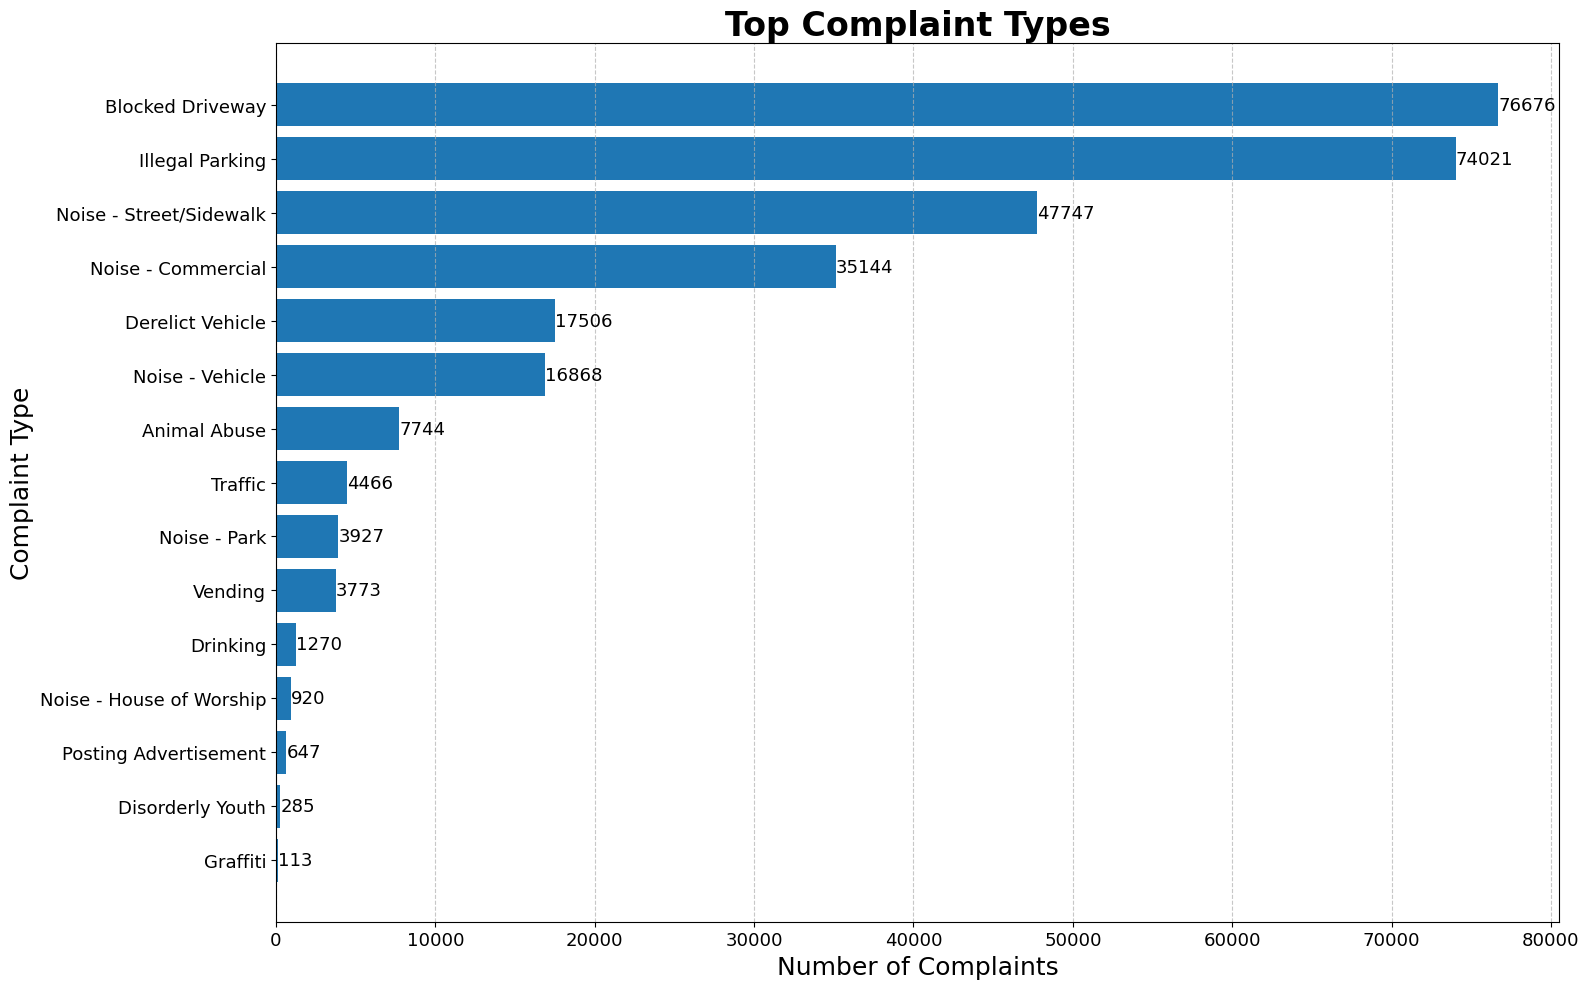

In [33]:
# Plot using Matplotlib only
plt.figure(figsize=(16, 10))
bars = plt.barh(complaints_count.index, complaints_count.values)

# Add title and labels
plt.title('Top Complaint Types', fontsize=24, fontweight='bold')
plt.xlabel('Number of Complaints', fontsize=18)
plt.ylabel('Complaint Type', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Add values on bars
for i, v in enumerate(complaints_count.values):
    plt.text(v + 5, i, str(v), va='center', fontsize=13)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Insight 2: Complaint Types by Avg Closing Time (in Hours)  
Here visualization shows which complaint types take the most time to get closed, on average.

In [35]:
# Creating a new column 'Request_Closing_Hours'
df["Request_Closing_Hours"] = df["Request_Closing_Time"].dt.total_seconds() / 3600

# Step 1: Group by Complaint Type and get average
avg_closing_time = df.groupby("Complaint Type")["Request_Closing_Hours"].mean().sort_values(ascending=True)
avg_closing_time = avg_closing_time.tail(20)
avg_closing_time 

Complaint Type
Posting Advertisement       1.975995
Noise - Commercial          3.137244
Noise - House of Worship    3.199755
Noise - Park                3.402670
Noise - Street/Sidewalk     3.442281
Traffic                     3.451719
Disorderly Youth            3.568815
Noise - Vehicle             3.598224
Drinking                    3.857205
Vending                     4.011750
Illegal Parking             4.483452
Blocked Driveway            4.737920
Animal Abuse                5.218536
Graffiti                    7.151251
Derelict Vehicle            7.347363
Name: Request_Closing_Hours, dtype: float64

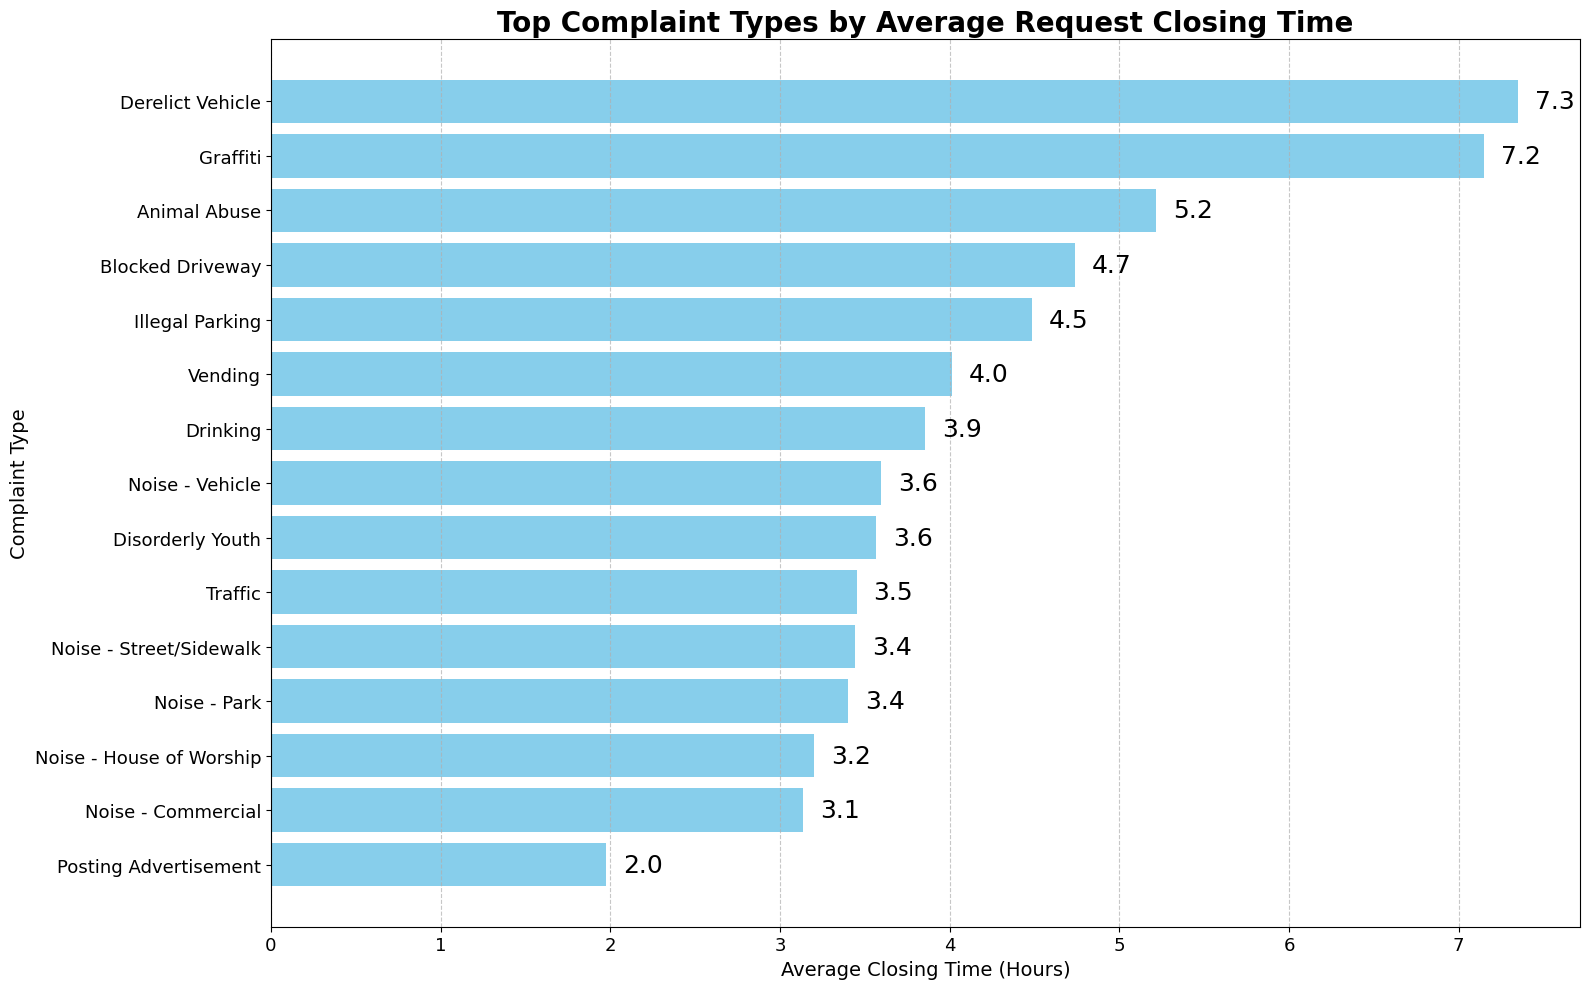

In [36]:
# Step 2: Plot using Matplotlib
plt.figure(figsize=(16, 10))
bars = plt.barh(avg_closing_time.index, avg_closing_time.values, color="skyblue")

plt.title("Top Complaint Types by Average Request Closing Time", fontsize=20, fontweight='bold')
plt.xlabel("Average Closing Time (Hours)", fontsize=14)
plt.ylabel("Complaint Type", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Add value labels to bars
for i, v in enumerate(avg_closing_time.values):
    plt.text(v + 0.1, i, f"{v:.1f}", va='center', fontsize=18)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Insight 3: Complaints Distribution Across Boroughs

This insight shows the number of complaints in each borough and the top 15 complaint types within them. It helps identify which boroughs have the most issues and what kinds of complaints are most common in each.

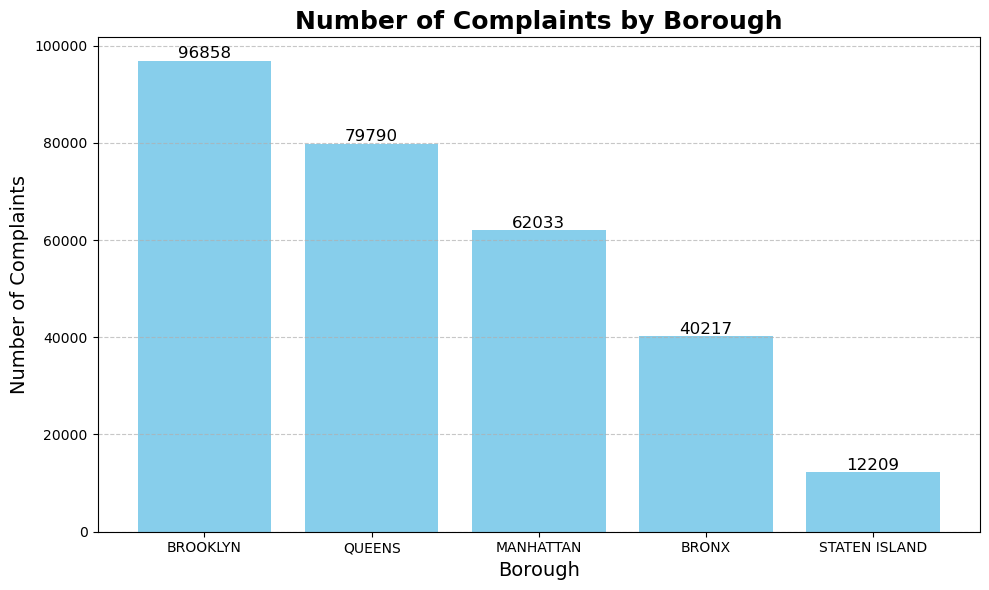

In [38]:
# Number of Complaints by Borough
borough_counts = df['Borough'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(borough_counts.index, borough_counts.values, color='skyblue')

plt.title("Number of Complaints by Borough", fontsize=18, fontweight='bold')
plt.xlabel("Borough", fontsize=14)
plt.ylabel("Number of Complaints", fontsize=14)

# Add values on top of bars
for i, v in enumerate(borough_counts.values):
    plt.text(i, v + 500, str(v), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

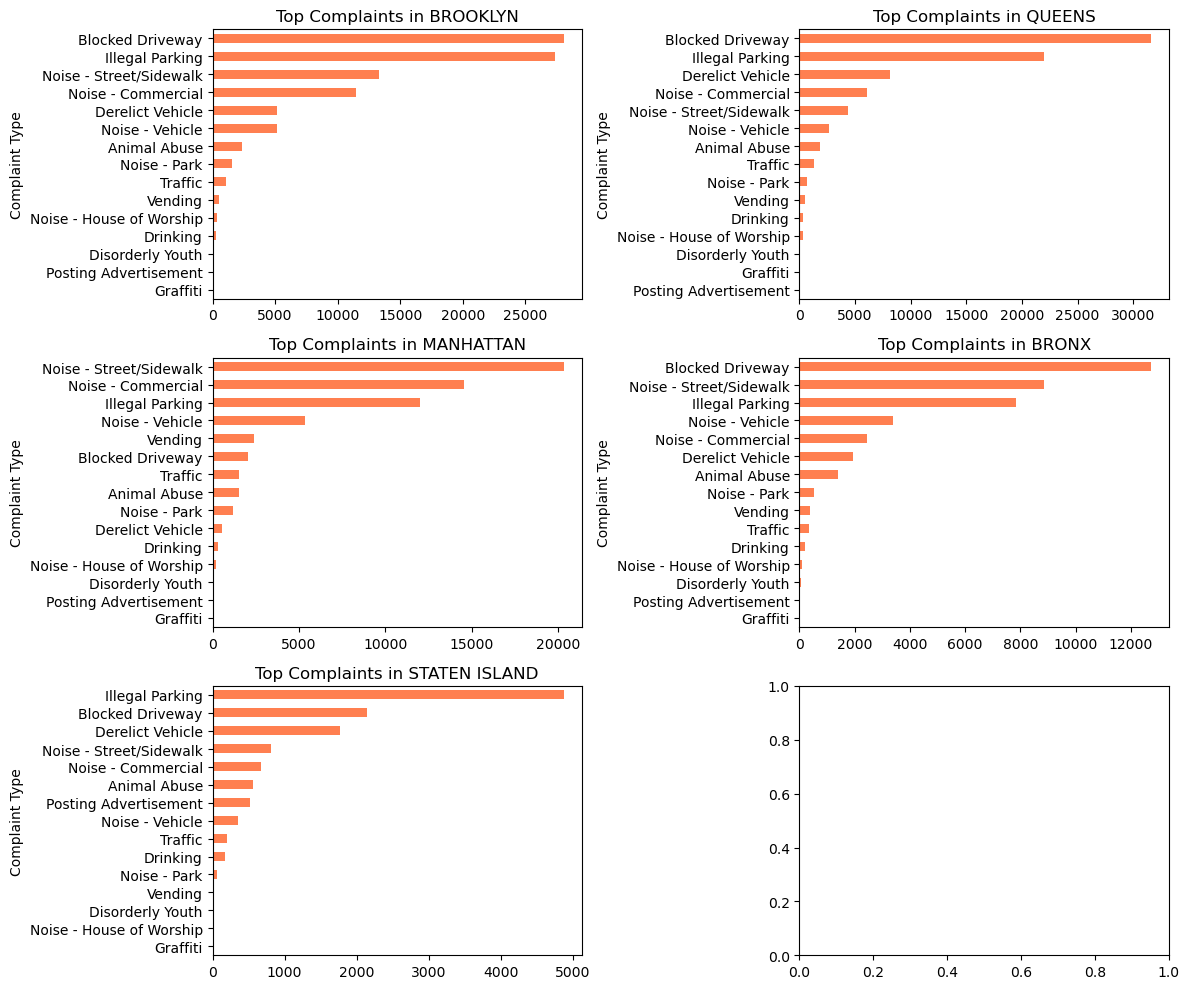

In [39]:
# Top 15 Complaint Types per Borough
Top_borough = df['Borough'].value_counts().keys()

# Create a table of complaint counts per borough
comp_per_borough = df.groupby(['Complaint Type', 'Borough']).size().unstack()
comp_per_borough = comp_per_borough[Top_borough]

# Plotting
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 10))

for i, (label, col) in enumerate(comp_per_borough.items()):
    ax = axes[int(i / col_number), i % col_number]
    top_15_complaints = col.sort_values(ascending=False)[:15]
    top_15_complaints.sort_values().plot(kind='barh', ax=ax, color='coral')
    ax.set_title(f"Top Complaints in {label}", fontsize=12)

plt.tight_layout()
plt.show()

#### Insight 4: Complaints by Day of the Week  
This shows how many complaints are made on each day. It helps to find busy complaint days.

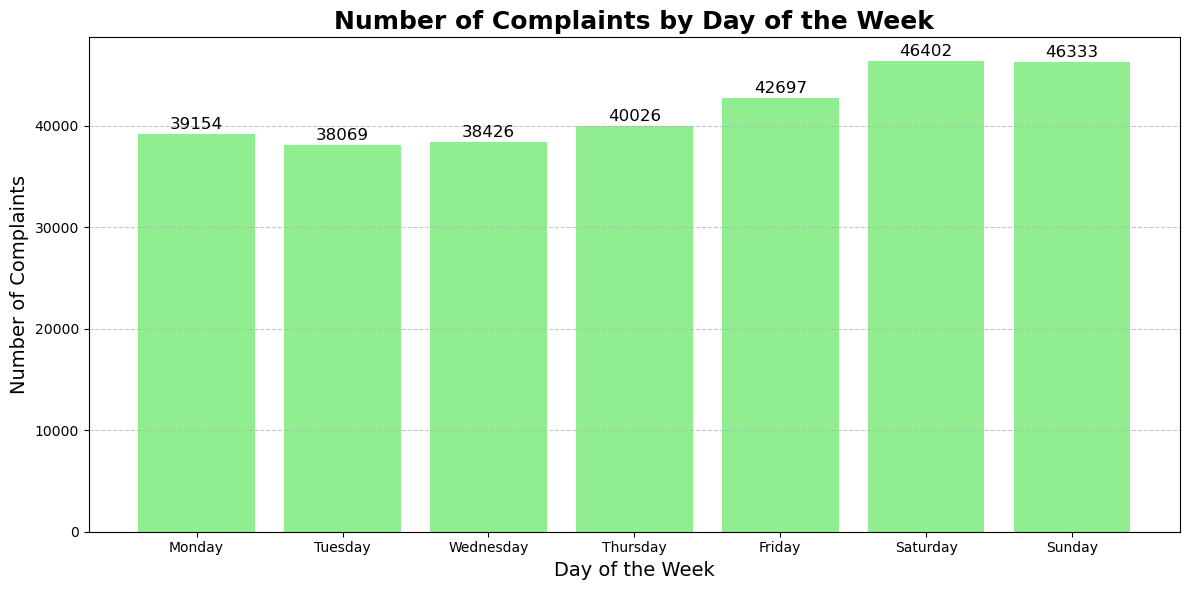

In [41]:
# Extract day of week from 'Created Date'
df['Day of Week'] = df['Created Date'].dt.day_name()

# Order days manually
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
complaints_by_day = df['Day of Week'].value_counts().reindex(days_order)

plt.figure(figsize=(12, 6))
bars = plt.bar(days_order, complaints_by_day.values, color='lightgreen')
plt.title("Number of Complaints by Day of the Week", fontsize=18, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Number of Complaints", fontsize=14)

# Add values on top of bars
for i, v in enumerate(complaints_by_day.values):
    plt.text(i, v + 500, str(v), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 10. Arrange the complaint types according to their average 'Request_Closing_Time', categorized by various locations. Illustrate it through graph as well.    

Here it shows which complaint types take the longest to close, grouped by location. It helps identify which services are slower in which areas.

In [43]:
# Convert the 'Request_Closing_Time' column from timedelta to hours 
df['Request_Closing_Hours'] = df['Request_Closing_Time'].dt.total_seconds() / 3600

# Group by location and complaint type, then get average closing time
grouped = df.groupby(['Location Type', 'Complaint Type'])['Request_Closing_Hours'].mean()

# Sort by average closing time (highest first)
sorted_grouped = grouped.sort_values(ascending=False)

# Get top 15 entries and reset index
top15 = sorted_grouped.head(15).reset_index(name='Avg_Closing_Time_Hours')
top15

,Location Type,Complaint Type,Avg_Closing_Time_Hours
0,Roadway Tunnel,Derelict Vehicle,17.964167
1,Street/Sidewalk,Graffiti,12.037522
2,Highway,Derelict Vehicle,8.195705
3,Vacant Lot,Derelict Vehicle,7.473925
4,Street/Sidewalk,Derelict Vehicle,7.343121
5,Residential Building/House,Graffiti,5.878800
6,Store/Commercial,Graffiti,5.560642
7,Parking Lot,Animal Abuse,5.546789
8,Residential Building/House,Animal Abuse,5.400516
9,Commercial,Animal Abuse,5.342769


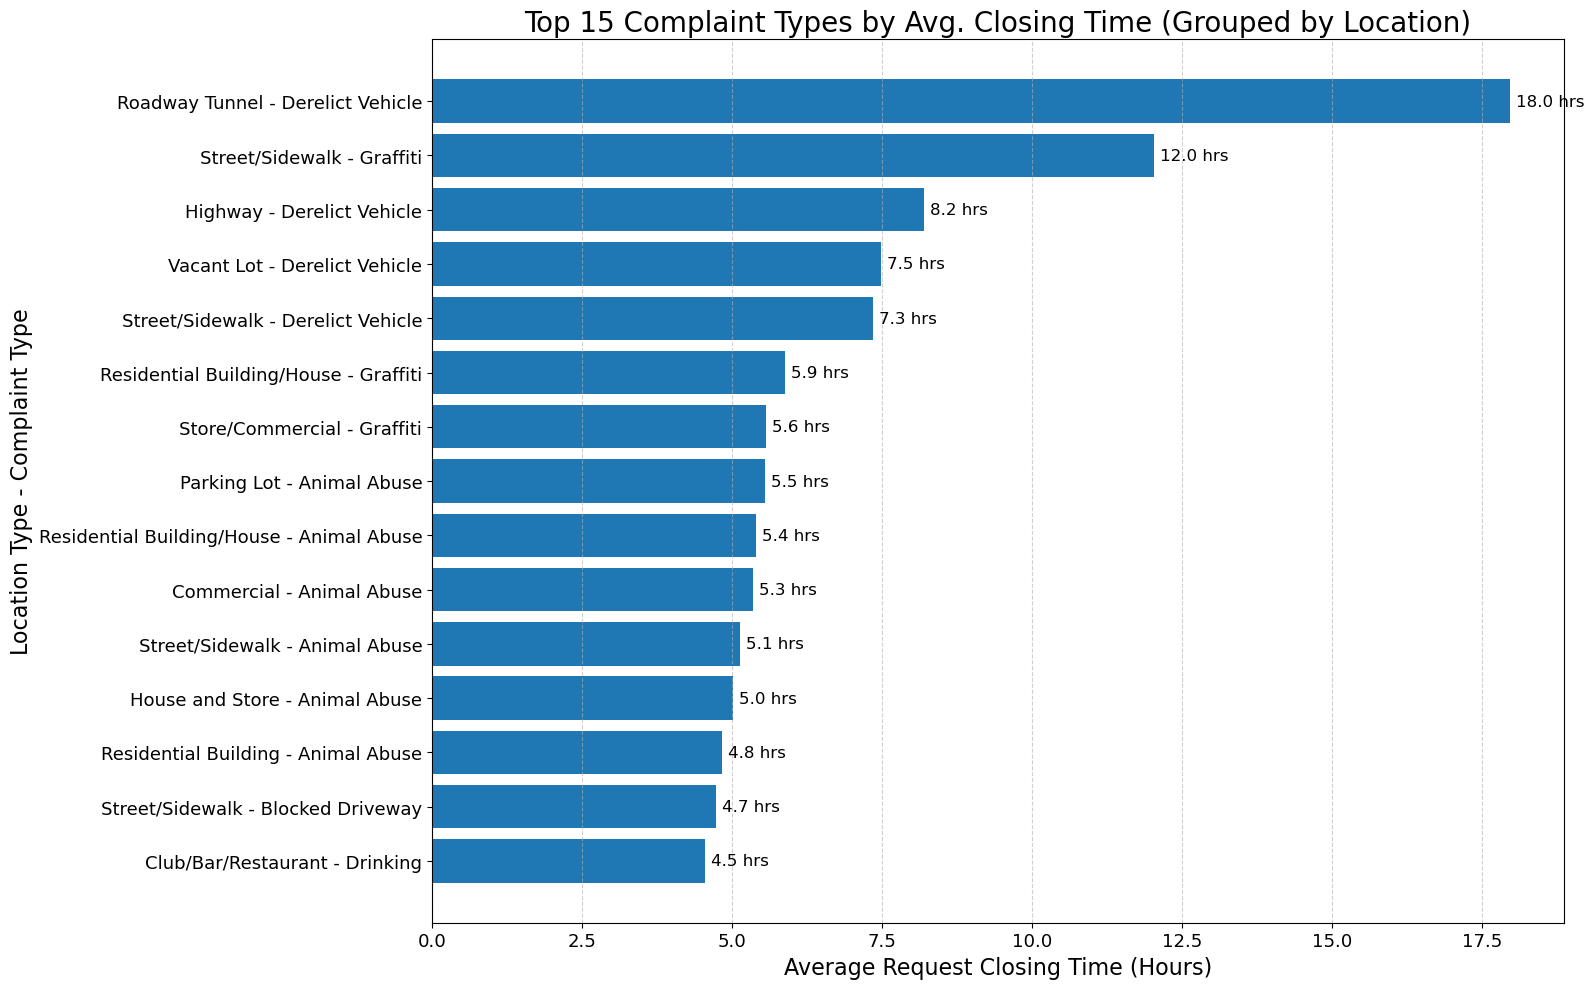

In [44]:
# Plotting top 15 complaint types by avg. closing time (hours)
plt.figure(figsize=(16, 10))

bars = plt.barh(
    y=top15['Location Type'] + " - " + top15['Complaint Type'],
    width=top15['Avg_Closing_Time_Hours']
)

plt.gca().invert_yaxis()  # Show highest on top

# Add titles and labels
plt.title('Top 15 Complaint Types by Avg. Closing Time (Grouped by Location)', fontsize=20)
plt.xlabel('Average Request Closing Time (Hours)', fontsize=16)
plt.ylabel('Location Type - Complaint Type', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Add values on the bars
for i, v in enumerate(top15['Avg_Closing_Time_Hours']):
    plt.text(v + 0.1, i, f"{v:.1f} hrs", va='center', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Statistical Testing  
### 11. Test 1: Whether the average response time across complaint types is similar or not. 
- State the Null Hypothesis (H0) and Alternate Hypothesis (H1). 
- Perform the statistical test and provide the p-value. 
- Interpret the results to accept or reject the Null Hypothesis. 

In [46]:
# viewing the columns
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City', 'Status',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Hours', 'Day of Week'],
      dtype='object')

#### **Goal:** Check if average response times are the similar or not for different complaint types.

#### Hypotheses:
- **H₀ (Null):** Average closing times are the similar.
- **H₁ (Alternative):** Average closing times are different.
#### Method:
- Removed top 5% outliers.
- Grouped by complaint type and did a one-way ANOVA test.

In [48]:
# Step 1: Remove top 5% outliers based on the 95th percentile
threshold = df['Request_Closing_Hours'].quantile(0.95)
filtered_df = df[df['Request_Closing_Hours'] <= threshold]

# Step 2: Grouping by Complaint Type and perform analysis on each complaint type
complaints = filtered_df['Complaint Type'].value_counts().index
anova_df = filtered_df[filtered_df['Complaint Type'].isin(complaints)]

# Step 3: Group the closing times by complaint type
groups = [group['Request_Closing_Hours'].values for name, group in anova_df.groupby('Complaint Type')]

# Step 4: Perform one-way ANOVA
f_stat, p_value = f_oneway(*groups)

# Step 5: Output the results
print("F-statistic:", f_stat)
print("p-value:", p_value)

# Step 6: Interpret the results
alpha = 0.05  # Common significance level
if p_value > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')


F-statistic: 517.6155298171007
p-value: 0.0
Different distributions (reject H0)


### 12. Test 2: Whether the type of complaint or service requested and location are related. 
- State the Null Hypothesis (H0) and Alternate Hypothesis (H1). 
- Perform the statistical test and provide the p-value. 
- Interpret the results to accept or reject the Null Hypothesis.

In [50]:
# Create contingency table
contingency_table = pd.crosstab(df['Location Type'], df['Complaint Type'])
contingency_table.head(5)

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
Location Type,,,,,,,,,,,,,,,
Club/Bar/Restaurant,0,0,0,0,365,0,0,16807,0,0,0,0,0,0,0
Commercial,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Highway,0,0,13,0,0,0,0,0,0,0,0,0,0,183,0
House and Store,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0
House of Worship,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0


#### **Goal:** Check if complaint type and location are related.

#### Hypotheses:
- **H₀ (Null):** Complaint type and location are independent.
- **H₁ (Alternative):** Complaint type and location are related.

#### Method:
- Created a contingency table to compare complaint types and locations.
- Performed a Chi-Square test to analyze the relationship.

In [52]:
# Contigency table
table = contingency_table 

# Run Chi-Square test on the table
# stat     -> The test statistic value
# p        -> The p-value result from the test
# dof      -> Degrees of freedom used in the test
# expected -> The expected counts if there is no relationship
stat, p, dof, expected = chi2_contingency(table)

In [53]:
# Output results
print("Chi-Square Statistic:", stat)
print("Degrees of Freedom:", dof)
print("p-value:", p)

# Interpretation
alpha = 0.05
if p > alpha:
    print("Fail to reject H0: Complaint type and location are independent.")
else:
    print("Reject H0: Complaint type and location are related.")

Chi-Square Statistic: 1049203.872020897
Degrees of Freedom: 182
p-value: 0.0
Reject H0: Complaint type and location are related.
